# VASSILIS PANAGAKIS

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import nltk

In [2]:
from pandas import DataFrame, read_csv

df = pd.read_csv("train.csv")

### Pre-processing of data

drop all the rows that do not contain a value in 'neighbourhood' column

In [3]:
df.dropna(subset=['neighbourhood'], inplace=True) 
df.reset_index(drop=True, inplace=True)

transform 'price', 'weekly_price', 'monthly_price' values from string to float

In [4]:
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(float)

df['weekly_price'] = df['weekly_price'].str.replace('$', '', regex=False)
df['weekly_price'] = df['weekly_price'].str.replace(',', '', regex=False)
df['weekly_price'] = df['weekly_price'].astype(float)

df['monthly_price'] = df['monthly_price'].str.replace('$', '', regex=False)
df['monthly_price'] = df['monthly_price'].str.replace(',', '', regex=False)
df['monthly_price'] = df['monthly_price'].astype(float)

calculate seperately the average for each month

In [5]:
feb = df.loc[df['Month'] == 'Febrouary']
mpr_feb = feb['price'].mean()
mpr1_feb = feb['weekly_price'].mean()
mpr2_feb = feb['monthly_price'].mean()

mar = df.loc[df['Month'] == 'March']
mpr_mar = mar['price'].mean()
mpr1_mar = mar['weekly_price'].mean()
mpr2_mar = mar['monthly_price'].mean()

apr = df.loc[df['Month'] == 'April']
mpr_apr = apr['price'].mean()
mpr1_apr = apr['weekly_price'].mean()
mpr2_apr = apr['monthly_price'].mean()

replace the na values of columns 'price', 'weekly_price', 'monthly_price' with the average value of each column

In [6]:
mpr = (mpr_feb + mpr_mar + mpr_apr) / 3
mpr1 = (mpr1_feb + mpr1_mar + mpr1_apr) / 3
mpr2 = (mpr2_feb + mpr2_mar + mpr2_apr) / 3

df[['price']] = df[['price']].fillna(value=mpr)
df[['weekly_price']] = df[['weekly_price']].fillna(value=mpr1)
df[['monthly_price']] = df[['monthly_price']].fillna(value=mpr2)

a sample of our data

In [7]:
pd.set_option("display.max_rows", None)
df.head(30)

,id,name,description,transit,neighbourhood,latitude,longitude,room_type,price,weekly_price,monthly_price,last_review,review_scores_rating,Month,number_of_reviews,comments
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.988879,23.764315,Entire home/apt,71.0,700.000000,2800.000000,2019-01-12,96.0,Febrouary,17,Το διαμέρισμα ήταν καλύτερο από όσο περίμενα! ...
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.988434,23.763447,Entire home/apt,82.0,560.000000,2240.000000,2017-11-23,92.0,Febrouary,31,"Sehr gute Unterkunft, sauber und bequem , ist ..."
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.987834,23.764787,Entire home/apt,47.0,420.000000,1680.000000,2019-02-01,97.0,Febrouary,27,ήταν όλα τελεια
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.988607,23.764222,Entire home/apt,37.0,350.000000,1400.000000,2019-02-02,97.0,Febrouary,42,I was in town for 1 week for business. Manos p...
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.989498,23.763562,Entire home/apt,47.0,420.000000,1680.000000,2019-01-11,95.0,Febrouary,16,Φιλόξενος ο οικοδεσπότης και πρόθυμος να μας β...
5,27262,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,Ambelokipi,37.988928,23.764749,Entire home/apt,47.0,350.000000,1400.000000,2017-05-15,95.0,Febrouary,16,The apartment was very clean and had everythin...
6,28186,❤️Deluxe central loft near Acropolis❤️,⭐️Don't waste your precious time commuting. ⭐️...,Great transportation links. Three metro statio...,Plaka,37.976804,23.729238,Entire home/apt,49.0,406.251272,1342.064538,2019-01-16,96.0,Febrouary,408,Awesome space in a epic location with the main...
7,31155,sleep on sailing boat,"on beautiful island of Aigina, 30 minutes from...",NaN,Gazi,37.979619,23.715894,Private room,39.0,406.251272,1342.064538,NaN,NaN,Febrouary,0,NaN
8,33704,"Artist's studio in Athens, safe area, near metro",Metro from Airport (4min to station) Safe area...,"Metro, buses, trolley, and private parking",Ambelokipi,37.990522,23.765928,Entire home/apt,27.0,406.251272,1342.064538,2019-01-27,97.0,Febrouary,30,"Nicole's apartment is cozy and homey, as she i..."
9,38100,Stay at the heart of Athens (100m²),Located in one of the most luxurious and safer...,NaN,Pangrati,37.970753,23.742590,Entire home/apt,48.0,406.251272,1342.064538,2019-01-02,88.0,Febrouary,178,It was an amazing trip for me and most of the ...


### Smaller sample

for many of the queries we will use the following dataframe, because some rows have duplicate information

In [8]:
idf = df.drop_duplicates(subset=['id'], ignore_index=True)

## Most common room type

In [9]:
most_common = idf['room_type'].value_counts().idxmax()
print("The most common room type for our data is '%s'" % most_common)

The most common room type for our data is 'Entire home/apt'


## Diagrams that illustrate the change of prices within a 3-month period

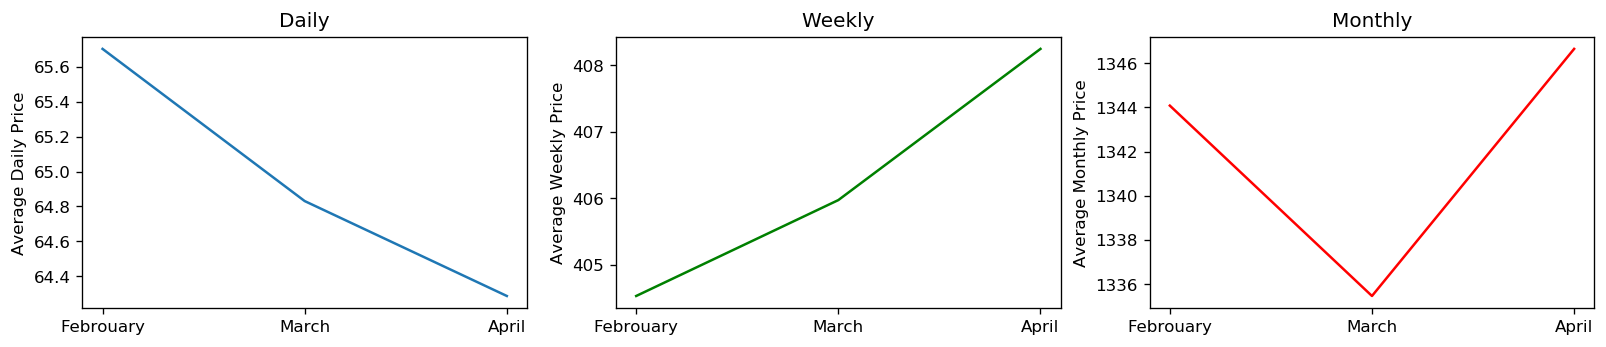

In [10]:
plt.figure(figsize=(8,3), dpi=120) 

plt.subplot(1,3,1)
plt.title('Daily')
plt.plot('month', 'avg_pr', data=pd.DataFrame({'month': np.array(['Febrouary' , 'March' , 'April']) , 'avg_pr': np.array([mpr_feb, mpr_mar, mpr_apr])}), marker=None)
plt.ylabel('Average Daily Price') 

plt.subplot(1,3,2)
plt.title('Weekly')  
plt.plot('month', 'avg_pr', data=pd.DataFrame({'month': np.array(['Febrouary' , 'March' , 'April']) , 'avg_pr': np.array([mpr1_feb, mpr1_mar, mpr1_apr])}), marker=None, color='g')
plt.ylabel('Average Weekly Price')

plt.subplot(1,3,3)
plt.title('Monthly')  
plt.plot('month', 'avg_pr', data=pd.DataFrame({'month': np.array(['Febrouary' , 'March' , 'April']) , 'avg_pr': np.array([mpr2_feb, mpr2_mar, mpr2_apr])}), marker=None, color='r')
plt.ylabel('Average Monthly Price')
plt.subplots_adjust(right=1.7)

plt.show()

## Top 5 neighbourhoods with the most reviews

In [11]:
sum_rev = df.groupby(['neighbourhood']).agg({'number_of_reviews':sum})
sum_rev.apply(lambda x: x.sort_values(ascending=False).head())

,number_of_reviews
neighbourhood,
Plaka,132361
Koukaki,90443
Neos Kosmos,84007
Psyri,54353
Metaxourgeio,44792


## Neighbourhood with the most estates

In [12]:
neigh_bnbs_df = idf.groupby(['neighbourhood']).size().reset_index(name='Number of Estates')
most_bnbs_ind = neigh_bnbs_df["Number of Estates"].idxmax()
most_bnbs = neigh_bnbs_df.loc[most_bnbs_ind, "Number of Estates"] 
neigh_bnbs_df.loc[neigh_bnbs_df['Number of Estates'] == most_bnbs]

,neighbourhood,Number of Estates
24,Plaka,1143


## Number of estates per neighbourhood

In [13]:
neigh_bnbs_df

,neighbourhood,Number of Estates
0,Agios Loukas,80
1,Agios Nikolaos,224
2,Akadimia Platonos,35
3,Ambelokipi,561
4,Attiki,285
5,Exarcheia,458
6,Gazi,170
7,Goudi,33
8,Ilisia,184
9,Kerameikos,65


## Number of estates per month

In [14]:
df.groupby(['Month']).size().reset_index(name='Number of Estates')

,Month,Number of Estates
0,April,9667
1,Febrouary,8867
2,March,9373


## Neighbourhood Histogram

<Figure size 1200x480 with 0 Axes>

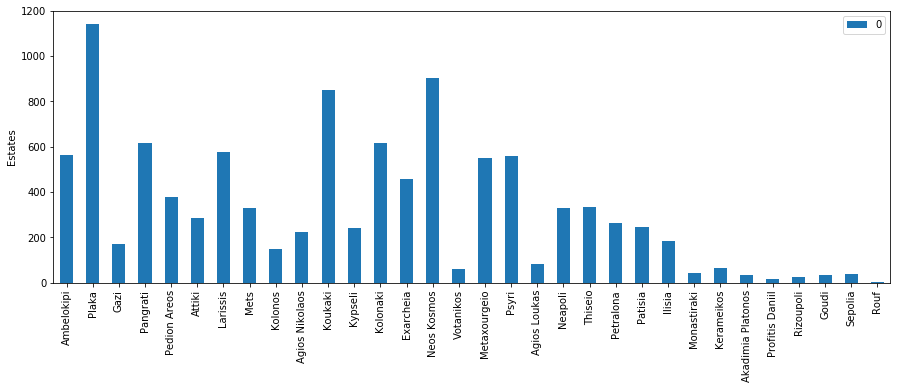

In [15]:
from collections import Counter

plt.figure(figsize=(10,4), dpi=120) 

neigh_list = idf['neighbourhood'].tolist()
neigh_counter = Counter(neigh_list)
hist = DataFrame.from_dict(neigh_counter, orient='index')
hist.plot(kind='bar', figsize=(15,5))
plt.ylabel("Estates")

plt.show()

## Most common room type per neighbourhood

In [16]:
idf.groupby(['neighbourhood'])['room_type'].agg(pd.Series.mode).reset_index(name='most_common_room_type')

,neighbourhood,most_common_room_type
0,Agios Loukas,Entire home/apt
1,Agios Nikolaos,Entire home/apt
2,Akadimia Platonos,Entire home/apt
3,Ambelokipi,Entire home/apt
4,Attiki,Entire home/apt
5,Exarcheia,Entire home/apt
6,Gazi,Entire home/apt
7,Goudi,Entire home/apt
8,Ilisia,Entire home/apt
9,Kerameikos,Entire home/apt


## Most expensive room type (All 3 months included) 

In [17]:
mean_pr = df.groupby('room_type')['price'].mean()
print("The most expensive room type is the %s with an average price of %f$" % (mean_pr.idxmax(), mean_pr.max()))

The most expensive room type is the Private room with an average price of 80.881281$


## Map of Athens (Febrouary)

In [18]:
fb = df.loc[df['Month'] == 'Febrouary']
sam_df = fb.sample(n=1000, random_state=1)

In [19]:
map_Athens = folium.Map(location=[37.983810, 23.727539], tiles='Stamen Terrain', zoom_start=13)

In [20]:
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(map_Athens)

for i, row in sam_df.iterrows(): #repeat for every estate
    if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['room_type'], icon=folium.Icon(color='green')).add_to(marker_cluster)
    
map_Athens

In [21]:
map_Athens.save('map_of_Athens.html')

## WordClouds

In [22]:
from wordcloud import WordCloud, STOPWORDS

### on 'neighbourhood' column

In [23]:
stopwords = set(STOPWORDS)
stopwords.update(["minute", "minutes", "Athen", "Athens", "located", "canceled", "everything", "need", "hidden",
                  "apartment", "place", "stay", "house", "flat", "reservation", "automated"])

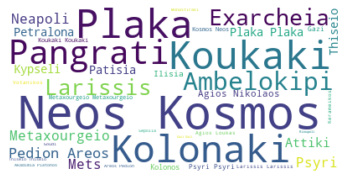

In [24]:
text1 = " ".join(i for i in idf['neighbourhood'])
wc1 = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.show()

### on 'transit' column

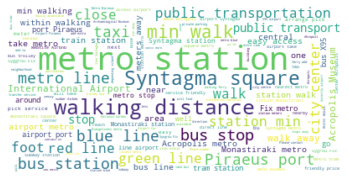

In [25]:
tr_df = idf.dropna(subset=['transit']) 

text2 = " ".join(i for i in tr_df['transit'])
wc2 = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

### on 'description' column

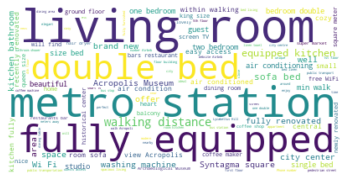

In [26]:
des_df = idf.dropna(subset=['description']) 

text3 = " ".join(i for i in des_df['description'])
wc3 = WordCloud(stopwords=stopwords, background_color="white").generate(text3)

plt.imshow(wc3, interpolation='bilinear')
plt.axis("off")
plt.show()

### on 'comments' column

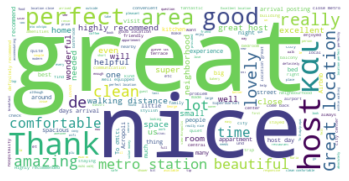

In [27]:
lr_df = idf.dropna(subset=['comments']) 

text4 = " ".join(i for i in lr_df['comments'])
wc4 = WordCloud(stopwords=stopwords, background_color="white").generate(text4)

plt.imshow(wc4, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3 best ranked neighbourhoods based on review score

In [28]:
mean_rev = idf.groupby('neighbourhood')['review_scores_rating'].mean().reset_index(name='average_rating')
mean_rev.nlargest(3, 'average_rating')

,neighbourhood,average_rating
29,Sepolia,98.375000
25,Profitis Daniil,97.916667
7,Goudi,97.625000


## 3 cheapest neighbourhoods

In [29]:
ppn = idf.groupby('neighbourhood')['price'].mean().reset_index(name='average_price_per_neighbourhood')
ppn.nsmallest(3, 'average_price_per_neighbourhood')

,neighbourhood,average_price_per_neighbourhood
1,Agios Nikolaos,35.178571
4,Attiki,37.403509
29,Sepolia,38.105263


## Price Category of estates (Bar diagram) 

In [30]:
data = []

for i in df['price']:
    if i < 40.0:
        data.append('Cheap')
    elif 40.0 <= i <= 70.0:
        data.append('Normal')
    else:
        data.append('Expensive')

df['price_category'] = data      

In [31]:
idf = df.drop_duplicates(subset=['id'], ignore_index=True)

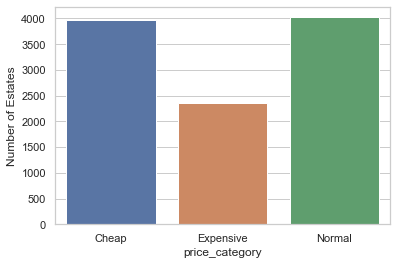

In [32]:
pr_cat_df = idf.groupby(['price_category']).size().reset_index(name='Number of Estates')

sns.set(style="whitegrid")
ax = sns.barplot(x="price_category", y="Number of Estates", data=pr_cat_df)

## Wordcloud vol 2 (Description)

In [33]:
stopwords = set(STOPWORDS)
stopwords.update(["minute", "minutes", "Athen", "Athens", "located", "canceled", "everything", "need", "hidden",
                  "apartment", "place", "stay", "house", "flat", "reservation", "automated",
                  "square", "walking", "heart", "metro", "station", "Acropolis", "center"])

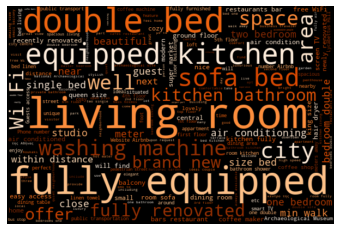

In [34]:
des_df = idf.dropna(subset=['description']) 

text = " ".join(i for i in des_df['description'])
wc = WordCloud(stopwords=stopwords, width=600, height=400, colormap="Oranges_r").generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Top 10 Bigrams

create 'name-description' concatatenation column

In [35]:
df['name_descr'] = df['name'] + ' ' + df['description']
df.dropna(subset=['name_descr'], inplace=True)

In [36]:
list_text = df["name_descr"].tolist()

remove symbols from the new column

In [37]:
SYMBOLS = '{}()[].,:;+-*/&|<>=~$'
clean_text = [item.translate({ord(SYM): None for SYM in SYMBOLS} ).strip() for item in list_text]

In [38]:
df['clean_nd'] = pd.Series(clean_text,index=df.index)

In [39]:
idf = df.drop_duplicates(subset=['id'], ignore_index=True)

In [40]:
clean_text = idf["clean_nd"].tolist()

create a big string of all strings in the 'name-description column'

In [41]:
bigstring = ' '.join(clean_text)

remove all the stopwords from the big string

In [42]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(bigstring)
no_sw_tokens = [word for word in tokens if not word in stopwords.words()]

In [43]:
from nltk.collocations import BigramCollocationFinder

finder = BigramCollocationFinder.from_words(tokens)
finder.apply_freq_filter(1000) #only bigrams that appear 1000+ times
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigrams = finder.nbest(bigram_measures.likelihood_ratio, 10) #find the 10 bigrams with the highest PMI
bigrams

[('living', 'room'),
 ('of', 'Athens'),
 ('in', 'the'),
 ('fully', 'equipped'),
 ('walking', 'distance'),
 ('metro', 'station'),
 ('heart', 'of'),
 ('The', 'apartment'),
 ('double', 'bed'),
 ('apartment', 'is')]